In [4]:

# 步驟 0: 匯入函式庫並上傳檔案

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import warnings

# 忽略 Matplotlib 可能產生的 UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

# 設定 Matplotlib 繪圖的預設樣式
plt.style.use('seaborn-v0_8-darkgrid')

# 上傳資料檔案
print("請上傳 'hw02-data.npz' 檔案。")
try:
    uploaded = files.upload()
    data_file_name = next(iter(uploaded))
    print(f"\n✅ 檔案 '{data_file_name}' 已成功上傳！")
except (ValueError, StopIteration):
    print("\n❌ 未上傳檔案。請重新執行此儲存格。")
    exit()

請上傳 'hw02-data.npz' 檔案。


Saving hw02-data.npz to hw02-data (1).npz

✅ 檔案 'hw02-data (1).npz' 已成功上傳！


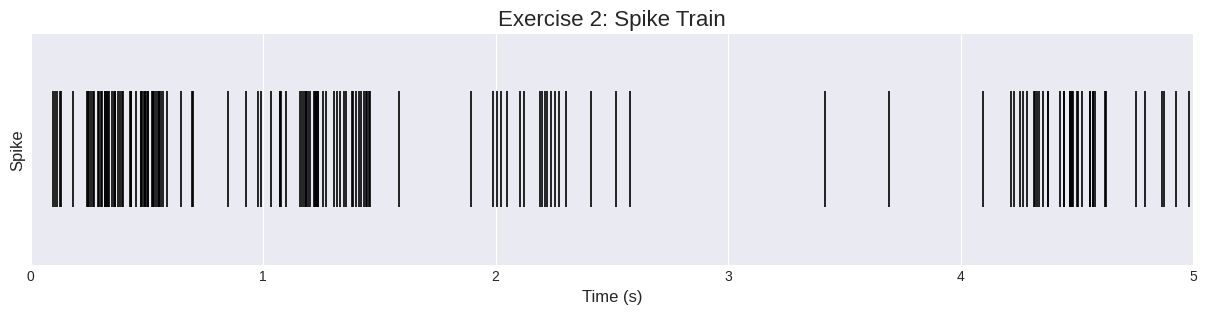

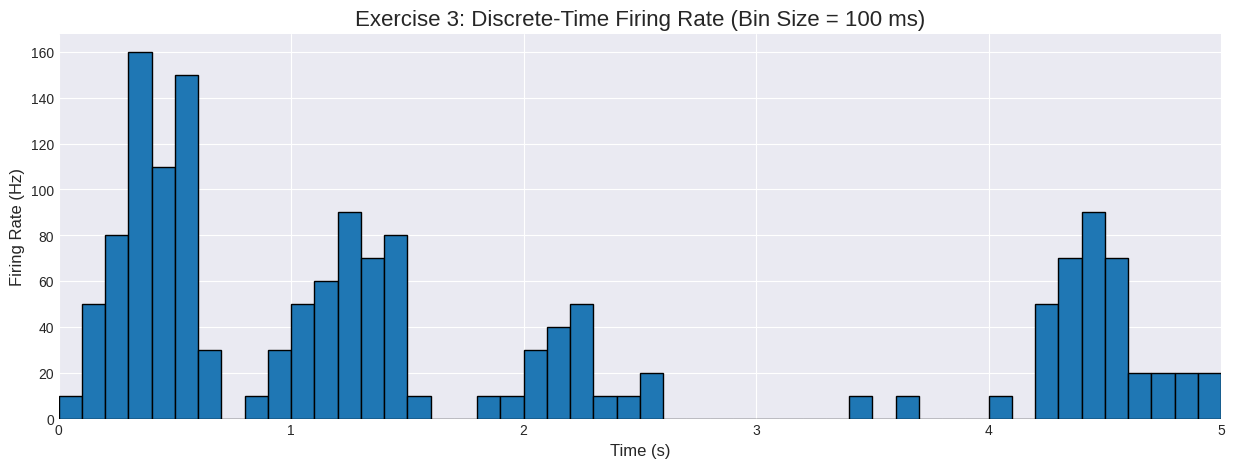

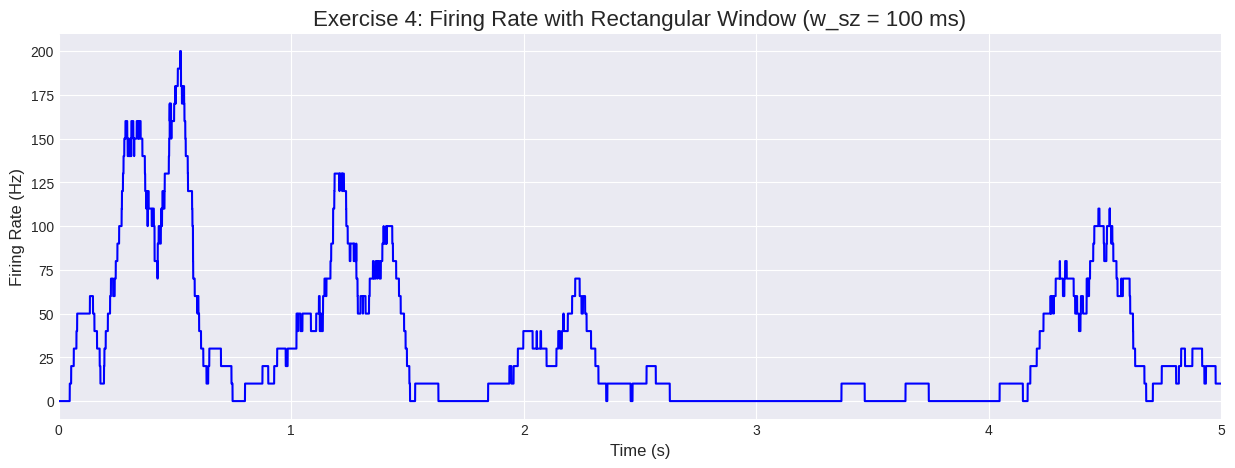

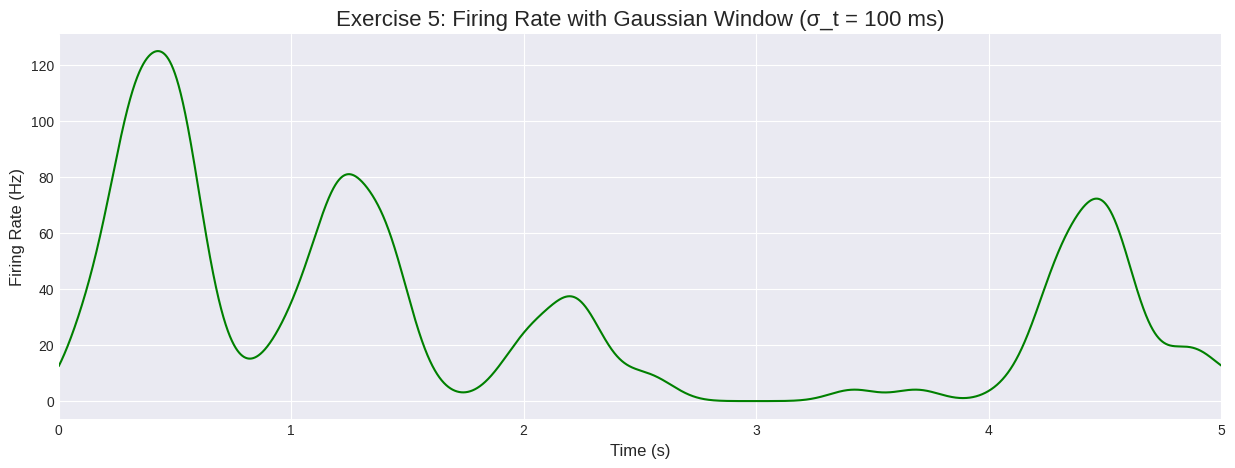

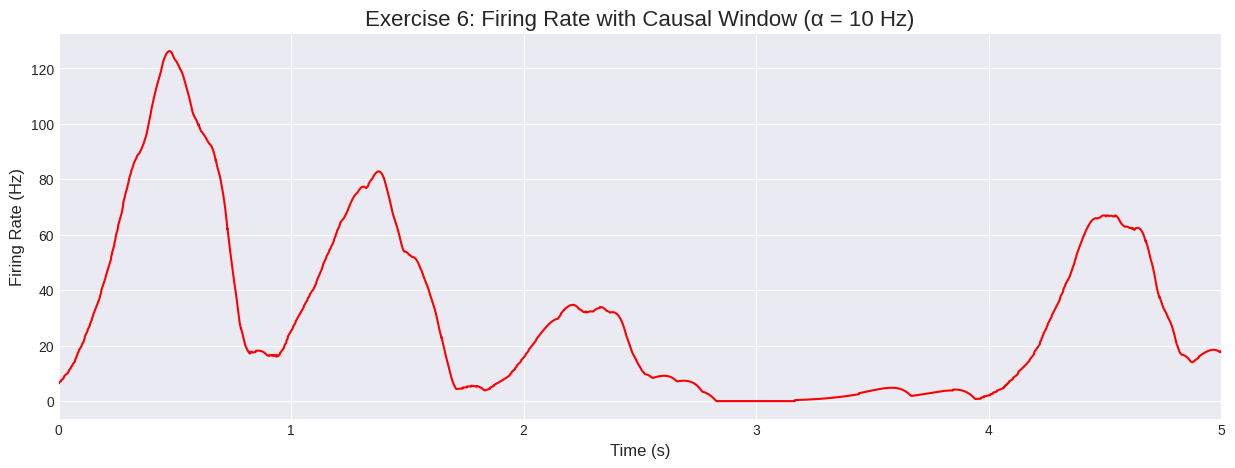


🎉 所有圖表已產生完畢！


In [5]:
# 步驟 1: 載入資料並進行計算
with np.load(data_file_name, allow_pickle=True) as f:
    frames = f['frames']
    delta_t = f['delta_t'][()]
    spikes = f['spikes']

# 設定通用變數
limit_time_s = 5.0
t_vec = np.arange(len(frames)) * delta_t
limit_index = np.searchsorted(t_vec, limit_time_s)


# 步驟 2: 產生所有練習的圖表
# Exercise 2: 繪製脈衝 (Subplot A)
spikes_in_range = spikes[spikes <= limit_time_s]
plt.figure(figsize=(15, 3))
plt.vlines(spikes_in_range, 0.5, 1.5, colors='black', lw=1.2)
plt.title("Exercise 2: Spike Train", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Spike", fontsize=12)
plt.yticks([])
plt.xlim(0, limit_time_s)
plt.ylim(0, 2)
plt.show()

# 定義所有練習的參數
EX3_BIN_WIDTH_S = 0.100      # 100 ms
EX4_WIN_DUR_S   = 0.100      # 100 ms
EX5_SIGMA_S     = 0.100      # 100 ms
EX6_ALPHA_HZ    = 10.0       # 1/alpha = 0.1 s

# Exercise 3: 離散時間放電率 (Subplot B)
bin_size_s = EX3_BIN_WIDTH_S
bins = np.arange(0, limit_time_s + bin_size_s, bin_size_s)
counts, bin_edges = np.histogram(spikes, bins=bins)
firing_rate_discrete = counts / bin_size_s
bin_centers = bin_edges[:-1] + bin_size_s / 2

plt.figure(figsize=(15, 5))
plt.bar(bin_centers, firing_rate_discrete, width=bin_size_s, align='center', edgecolor='black')
plt.title(f"Exercise 3: Discrete-Time Firing Rate (Bin Size = {bin_size_s*1000:.0f} ms)", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Firing Rate (Hz)", fontsize=12)
plt.xlim(0, limit_time_s)
plt.show()

# Exercises 4, 5, 6: 根據新需求定義窗函數與執行卷積
#- Ex4：用秒換成樣本數-
L_rect = max(1, int(round(EX4_WIN_DUR_S / delta_t)))
kernel_rect = np.ones(L_rect, float)
kernel_rect /= kernel_rect.sum()
rate_rect_hz = np.convolve(frames, kernel_rect, mode="same") / delta_t

#- Ex5：高斯 windows (更新為正規化方法以保持一致性)-
# 建立一個足夠長的對稱時間向量 (±5 個標準差)
t_kernel_gauss = np.arange(-5 * EX5_SIGMA_S, 5 * EX5_SIGMA_S + delta_t, delta_t)
kernel_gauss = (1.0 / (np.sqrt(2 * np.pi) * EX5_SIGMA_S)) * np.exp(-t_kernel_gauss**2 / (2 * EX5_SIGMA_S**2))
kernel_gauss /= kernel_gauss.sum() # 正規化
rate_gauss_hz = np.convolve(frames, kernel_gauss, mode="same") / delta_t

#- Ex6：alpha 因果窗；卷積時要反轉 kernel！
alpha = EX6_ALPHA_HZ
t_len = int(np.ceil((5.0/alpha) / delta_t))      # ~5 個時間常數
tt = np.arange(0, t_len + 1) * delta_t
kernel_alpha = (alpha**2) * tt * np.exp(-alpha * tt)  # t>=0
kernel_alpha /= kernel_alpha.sum() # 正規化
rate_alpha_hz = np.convolve(frames, kernel_alpha[::-1], mode="same") / delta_t

# Exercise 4: 繪製矩形窗結果 (Subplot C)
plt.figure(figsize=(15, 5))
plt.plot(t_vec[:limit_index], rate_rect_hz[:limit_index], color='blue')
plt.title(f"Exercise 4: Firing Rate with Rectangular Window (w_sz = {EX4_WIN_DUR_S*1000:.0f} ms)", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Firing Rate (Hz)", fontsize=12)
plt.xlim(0, limit_time_s)
plt.show()

# Exercise 5: 繪製高斯窗結果 (Subplot D)
plt.figure(figsize=(15, 5))
plt.plot(t_vec[:limit_index], rate_gauss_hz[:limit_index], color='green')
plt.title(f"Exercise 5: Firing Rate with Gaussian Window (σ_t = {EX5_SIGMA_S*1000:.0f} ms)", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Firing Rate (Hz)", fontsize=12)
plt.xlim(0, limit_time_s)
plt.show()

# Exercise 6: 繪製因果窗結果 (Subplot E)
plt.figure(figsize=(15, 5))
plt.plot(t_vec[:limit_index], rate_alpha_hz[:limit_index], color='red')
plt.title(f"Exercise 6: Firing Rate with Causal Window (α = {EX6_ALPHA_HZ:.0f} Hz)", fontsize=16)
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("Firing Rate (Hz)", fontsize=12)
plt.xlim(0, limit_time_s)
plt.show()

print("\n🎉 所有圖表已產生完畢！")

